First Problem - Exercise Recognition

In [60]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.patches as patches

import xgboost as xgb

In [61]:
X_train = joblib.load("Data/Xtrain1.pkl")
Y_train = np.load('Data/Ytrain1.npy')
print(X_train.shape)
print(Y_train.shape)

(700, 2)
(700,)


In [62]:
print(X_train)

     Patient_Id                                  Skeleton_Features
158           8  [0.01672805172463768, -0.5662699523188407, 0.0...
500          12  [0.03123780159177354, -0.5718956396, 0.0479631...
396           6  [0.023674554394231464, -0.5588386275217391, 0....
155           8  [0.009414516641025642, -0.5693782186153847, 0....
321           3  [0.015847331331651126, -0.5660038876666666, 0....
..          ...                                                ...
71            4  [0.00865563444, -0.5576752849466667, 0.0242797...
106           6  [0.017996815525, -0.5546415622, 0.032668157291...
270          14  [-0.06093925460784313, -0.5421445670294118, -0...
435           8  [-0.009460545267441861, -0.5828924643604652, 0...
102           6  [0.014680226106557379, -0.5484173288196722, 0....

[700 rows x 2 columns]


In [63]:
patient_ids = X_train["Patient_Id"].values
X_train = np.vstack(X_train["Skeleton_Features"].values)

In [64]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)  
print("patient_ids shape:", patient_ids.shape) 

X_train shape: (700, 132)
Y_train shape: (700,)
patient_ids shape: (700,)


In [65]:
connections = {
    'trunk': [(11, 12), (11, 23), (12, 24), (23, 24)],
    'right_arm': [(12, 14), (14, 16), (22, 16), (20, 16), (20, 18), (18, 16)],
    'left_arm': [(11, 13), (13, 15), (21, 15), (15, 19), (19, 17), (17, 15)],
    'right_leg': [(23, 25), (25, 27), (27, 31), (31, 29), (29, 27)],
    'left_leg': [(24, 26), (26, 28), (28, 30), (30, 32), (28, 32)]
}

colors = {
    'trunk': 'blue',
    'right_arm': 'red',
    'left_arm': 'green',
    'right_leg': 'orange',
    'left_leg': 'purple'
}

head_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

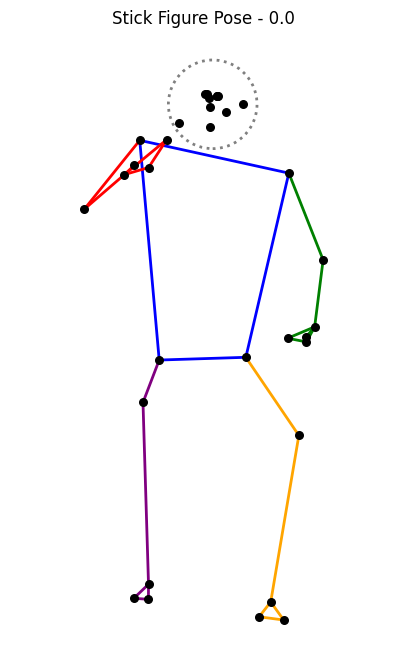

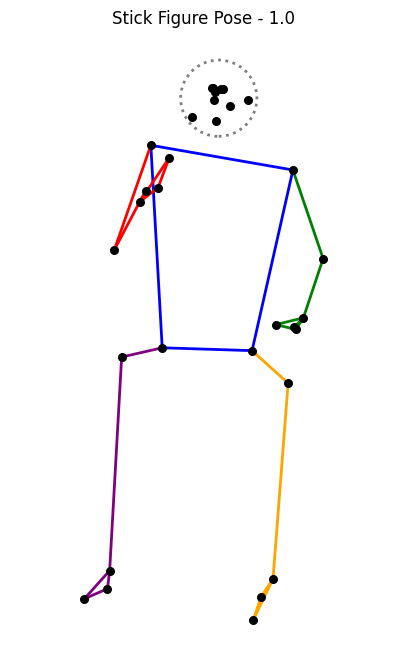

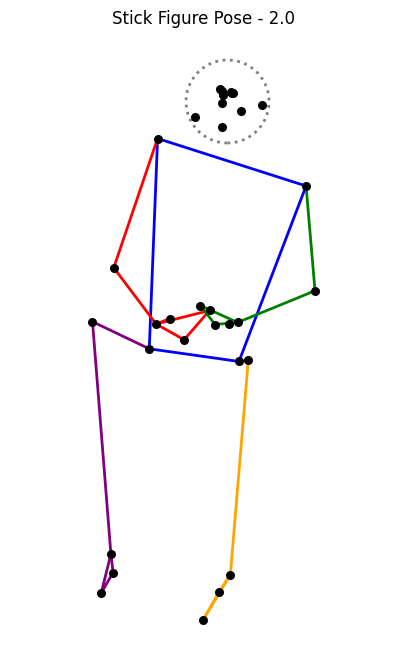

In [66]:
examples = [0, 4, 10]

for idx in examples:
    sample = X_train[idx]

    # Split into mean and std
    mean_coords = sample[:66]
    std_coords = sample[66:]

    # Extract x and y of 33 keypoints
    x = mean_coords[0::2]  # even indices
    y = mean_coords[1::2]  # odd indices

    # Get head points
    head_x = x[head_indices]
    head_y = -y[head_indices]  # use -y if you invert y in your plot

    # Calculate center as mean of head points
    center_x = head_x.mean()
    center_y = head_y.mean()

    # Calculate radius as max distance from center to any head point
    radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15  # 1.15 for padding

    fig, ax = plt.subplots(figsize=(5, 8))

    # Plot segments
    for part, segs in connections.items():
        for a, b in segs:
            ax.plot([x[a], x[b]], [-y[a], -y[b]], c=colors[part], lw=2)

    # Plot joints
    ax.scatter(x, -y, c='black', s=30, zorder=2)

    # Draw head circle
    circle = patches.Circle((center_x, center_y), radius, fill=False, linestyle='dotted', edgecolor='gray', lw=2)
    ax.add_patch(circle)

    ax.set_title(f"Stick Figure Pose - {Y_train[idx]}")
    ax.axis('equal')
    ax.axis('off')
    plt.show()

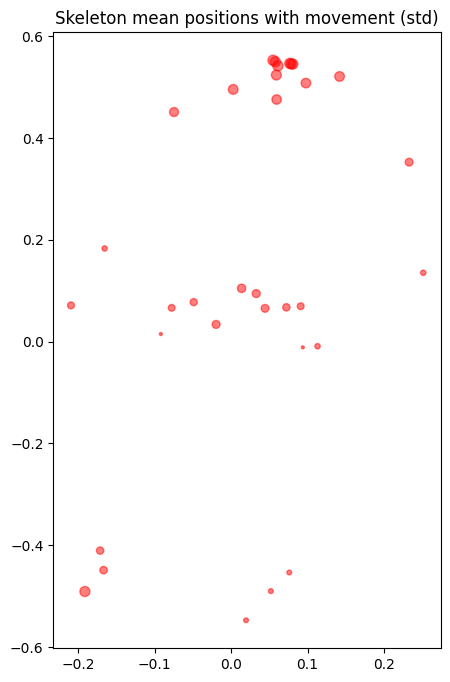

In [77]:
# Plot std as circle size
x_std = std_coords[0::2]
y_std = std_coords[1::2]

plt.figure(figsize=(5,8))
plt.scatter(x, -y, s=1000*x_std, c='red', alpha=0.5)  # bigger circle = more movement
plt.title("Skeleton mean positions with movement (std)")
plt.show()




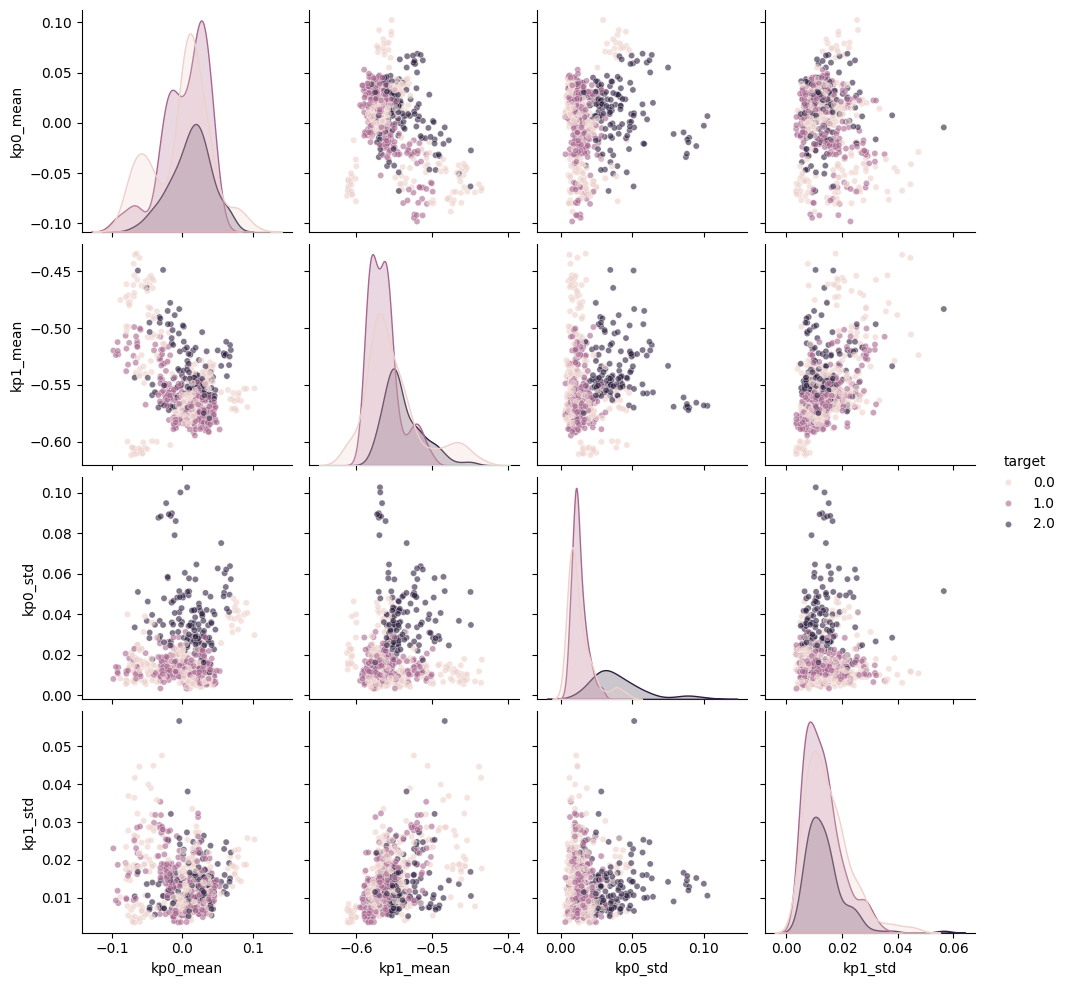

In [69]:
import pandas as pd

# Exemplo: crie o DataFrame a partir dos seus arrays ou listas
df = pd.DataFrame({
    "kp0_mean": X_train[:, 0],
    "kp1_mean": X_train[:, 1],
    "kp0_std": X_train[:, 66],
    "kp1_std": X_train[:, 67],
    "target": Y_train
})

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df[["kp0_mean", "kp1_mean", "kp0_std", "kp1_std", "target"]],
    hue="target",
    diag_kind="kde",
    plot_kws={"alpha":0.6, "s":20}
)
plt.show()

[ mean_x1, mean_y1, mean_x2, mean_y2, ..., mean_x33, mean_y33, 
  std_x1, std_y1, std_x2, std_y2, ..., std_x33, std_y33 ]
